In [1]:
#http://myinspirationinformation.com/uncategorized/audio-signals-in-python/#more-437

In [27]:
#required libraries
import urllib
import scipy.io.wavfile
import pydub
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft as fft
import IPython.display

%matplotlib inline

In [17]:
#a temp folder for downloads
temp_folder = "../data/"
filename = "morricone_30s"
#audio_path = temp_folder+"morricone_20s.mp3"
# file = 'morricone_1.mp3'

In [18]:
#read mp3 file
mp3 = pydub.AudioSegment.from_mp3(temp_folder+filename+".mp3")

#convert to wav
mp3.export(temp_folder+filename+".wav", format="wav")

#read wav file
rate, audData=scipy.io.wavfile.read(temp_folder+filename+".wav")

In [19]:
#the sample rate is the number of bits of infomration recorded per second
print(rate)
print(audData)

44100
[[    0     0]
 [    0     0]
 [    0     0]
 ...
 [-8044 -2917]
 [-9681 -3384]
 [-7458 -2538]]


In [20]:
#wav bit type the amount of information recorded in each bit often 8, 16 or 32 bit
audData.dtype

dtype('int16')

In [21]:
#wav length
audData.shape[0] / rate

13.692086167800454

In [22]:
#wav number of channels mono/stereo 
audData.shape[1]

2

In [23]:
#if stereo grab both channels
channel1=audData[:,0] #left 
channel2=audData[:,1] #right

In [24]:
#Energy of music
np.sum(channel1.astype(float)**2)
#this can be infinite and depends on the length of the music of the loudness often talk about power
#power - energy per unit of time
1.0/(2*(channel1.size)+1)*np.sum(channel1.astype(float)**2)/rate

178.59365404717272

In [25]:
#save wav file
scipy.io.wavfile.write(temp_folder+filename+".wav", rate, audData)

#save a file at half and double speed
# scipy.io.wavfile.write(temp_folder+filename+"2s.wav", round(rate/2), audData)
# scipy.io.wavfile.write(temp_folder+filename+"2b.wav", rate*2, audData)

In [36]:
channel1

array([    0,     0,     0, ..., -8044, -9681, -7458], dtype=int16)

In [42]:
IPython.display.Audio(data=channel1, rate=rate)

In [38]:
channel2

array([    0,     0,     0, ..., -2917, -3384, -2538], dtype=int16)

In [43]:
IPython.display.Audio(data=channel2, rate=rate)

array([    0. ,     0. ,     0. , ..., -5480.5, -6532.5, -4998. ])

In [48]:
#averaging the channels damages the music
# audDataMono = (channel1+channel2)/2
audDataMono = np.sum(audData.astype(float), axis=1)/2
audDataMono

array([    0. ,     0. ,     0. , ..., -5480.5, -6532.5, -4998. ])

In [45]:
#half speed
IPython.display.Audio(data=audDataMono, rate=round(rate/2))

In [41]:
#2x speed
IPython.display.Audio(data=audDataMono, rate=rate*2)

In [50]:
time = np.arange(0, float(audData.shape[0]), 1) / rate 
time

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       1.36920181e+01, 1.36920408e+01, 1.36920635e+01])

Text(0,0.5,'Amplitude')

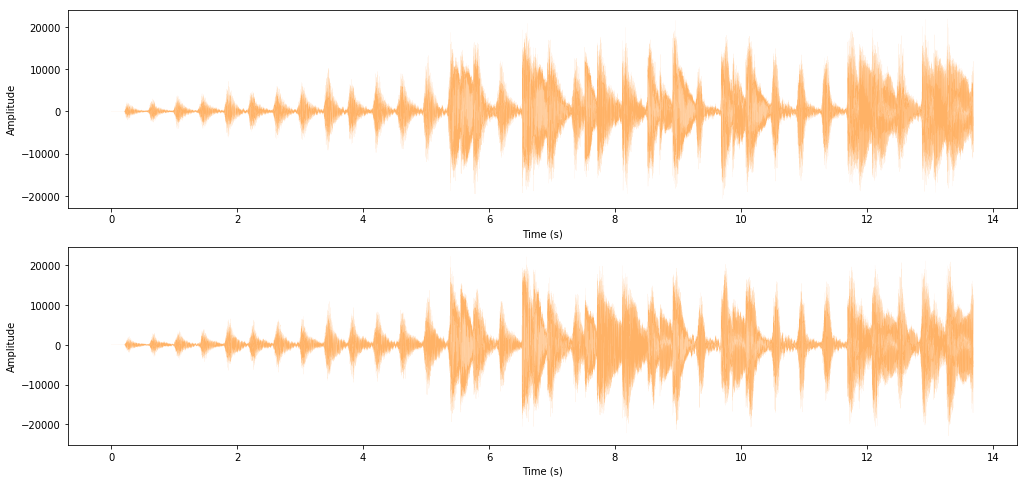

In [71]:
#plot amplitude (or loudness) over time
plt.figure(figsize=(17,8))

plt.figure(1)
plt.subplot(211)
#plt.title('Channel #1')
plt.plot(time, channel1, linewidth=0.06, alpha=0.6, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(212)
#plt.title('Channel #2')
plt.plot(time, channel2, linewidth=0.06, alpha=0.6, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# plt.savefig(temp_folder+'ampiltude.png', bbox_inches='tight')

/Users/akurochkin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

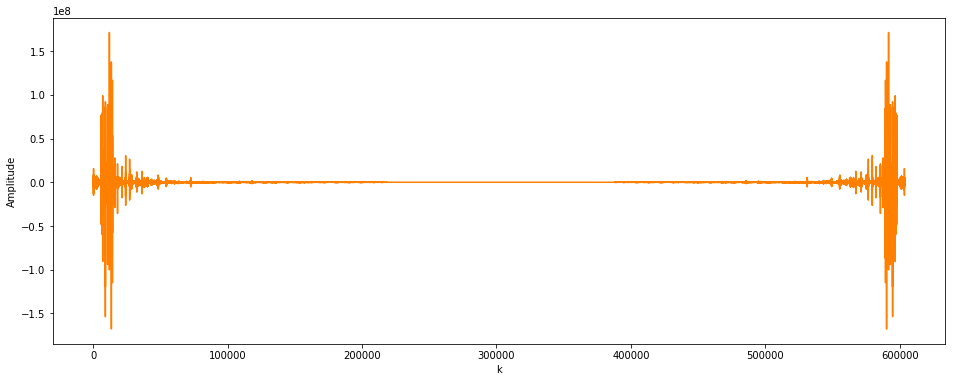

In [73]:
#Frequency (pitch) over time

#a fourier transform breaks the sound wave into series of waves that make up the main sound wave
#each of these waves will have its own amplitude (volume) and frequency. The frequency is the length over which the wave repeats itself. this is known as the pitch of the sound
fourier=fft.fft(channel1)

plt.figure(1, figsize=(16,6))
plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')
# plt.savefig(temp_folder+'fft.png', bbox_inches='tight')

In [74]:
#the fourier is symetrical due to the real and imaginary soultion. only interested in first real solution
n = len(channel1) 
fourier = fourier[0:(math.ceil(n/2))]

# scale by the number of points so that the magnitude does not depend on the length 
fourier = fourier / float(n) 
                 
#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);

In [130]:
#fourier.shape

/Users/akurochkin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Power (dB)')

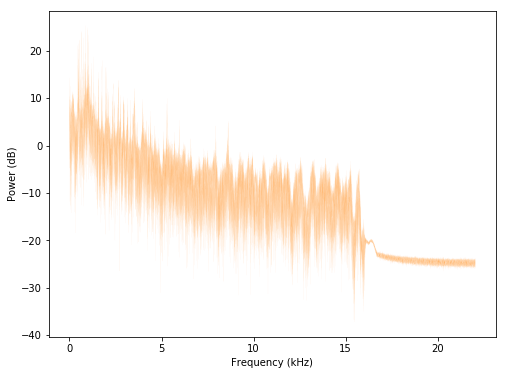

In [131]:
plt.figure(1, figsize=(8,6))
plt.plot(freqArray/1000, 10*np.log10(fourier), color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
# plt.savefig(temp_folder+'frequencies.png', bbox_inches='tight')

/Users/akurochkin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7221: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


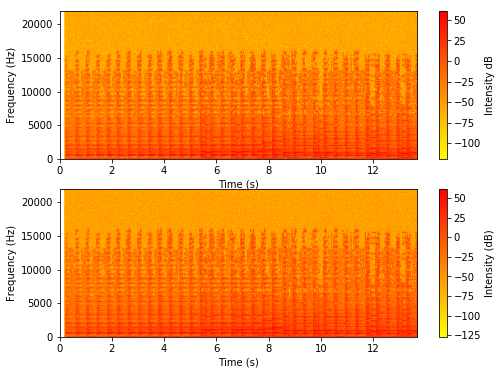

In [132]:
#plot spectogram
#the function calculates many fft's over NFFT sized blocks of data
#increasing NFFT gives you a more detail across the spectrum range but decreases the samples per second
#the sampling rate used determines the frequency range seen always 0 to rate/2

plt.figure(2, figsize=(8,6))
plt.subplot(211)
Pxx, freqs, bins, im = plt.specgram(channel1, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')
plt.subplot(212)
Pxx, freqs, bins, im = plt.specgram(channel2, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity (dB)')
#plt.show()
# plt.savefig(temp_folder+'spectogram.png', bbox_inches='tight')

/Users/akurochkin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7221: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


13.664943310657597

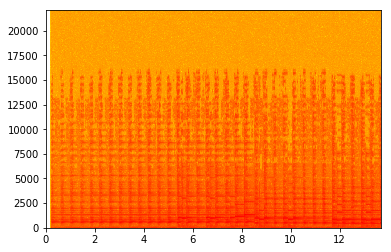

In [133]:
#Larger Window Size value increases frequency resolution
#Smaller Window Size value increases time resolution
#Specify a Frequency Range to be calculated for using the Goertzel function
#Specify which axis to put frequency


Pxx, freqs, timebins, im = plt.specgram(channel2, Fs=rate, NFFT=1024, noverlap=0, cmap=plt.get_cmap('autumn_r'))

channel1.shape
Pxx.shape 
freqs.shape
timebins.shape
np.min(freqs)
np.max(freqs)
np.min(timebins)
np.max(timebins)

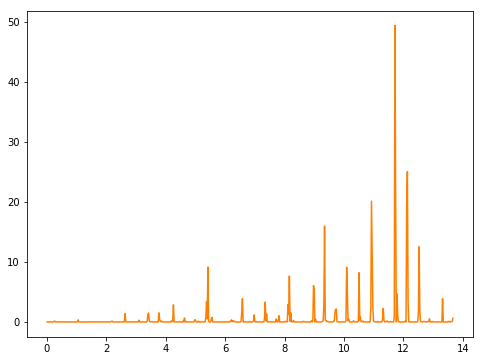

In [134]:
np.where(freqs==10034.47265625)
MHZ10=Pxx[233,:]
plt.figure(figsize=(8,6))
plt.plot(timebins, MHZ10, color='#ff7f00')
# plt.savefig(temp_folder+'MHZ10.png', bbox_inches='tight')